In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Exercício 1

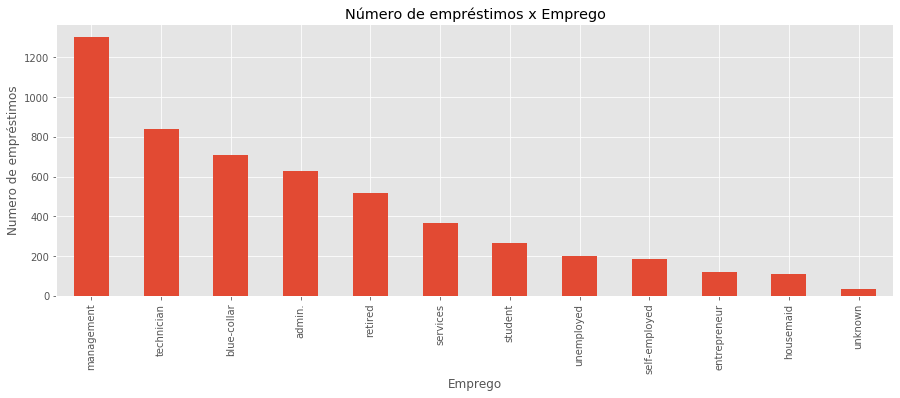

Numero de emprestimos 'default' para gerentes: 8
Numero de emprestimos 'housing' para gerentes: 431
Numero de emprestimos 'loan' para gerentes: 92


In [71]:
ex1_df = df[df['y'] == 'yes'].groupby(df['job'])
N = 12
ex1_df['job'].count().nlargest(N).plot.bar(figsize=(15, 5))
plt.grid(True)
plt.ylabel("Numero de empréstimos")
plt.xlabel("Emprego")
plt.title("Número de empréstimos x Emprego")
plt.show()

print("Numero de emprestimos 'default' para gerentes:", 
      len(df[(df['y'] == 'yes') & (df['job'] == 'management') & (df['default'] == 'yes')]))
print("Numero de emprestimos 'housing' para gerentes:", 
      len(df[(df['y'] == 'yes') & (df['job'] == 'management') & (df['housing'] == 'yes')]))
print("Numero de emprestimos 'loan' para gerentes:", 
      len(df[(df['y'] == 'yes') & (df['job'] == 'management') & (df['loan'] == 'yes')]))


Como é possível observar, a profissão gerente (do inglês, management), é a que possui o maior número de empréstimos, portanto, possui a maior tendência a fazer empréstimos. Além disso, ao contar cada tipo de empréstimo para os gerentes, observa-se que o imobiliário obteve a maior ocorrência.

## Exercício 2

Contando-se o número de empréstimos aceitos em relação ao número de contatos:

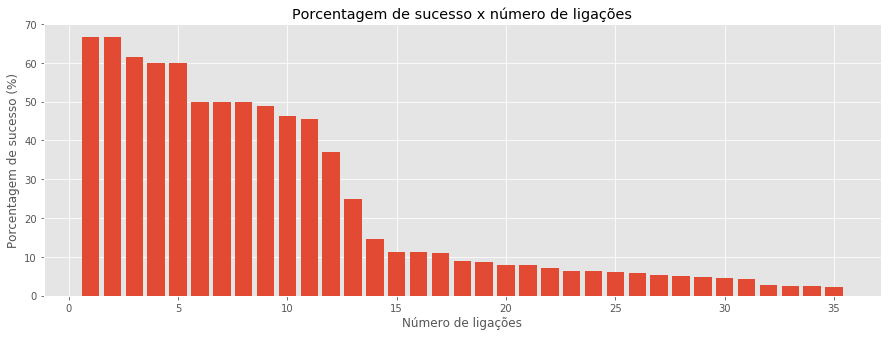

In [154]:
ex2_df = df.groupby(['campaign'])
counts = ex2_df['y'].value_counts()
# pct_sucess = number_of_yes / (number_of_no + number_of_yes)
pct_sucess = list(sorted(np.array(counts)[1::2]*100 / (np.array(counts)[::2] + np.array(counts)[1::2]), reverse=True))
x = range(1, len(pct_sucess)+1)
plt.figure(figsize=(15, 5))
plt.bar(x=x, height=pct_sucess)
plt.title('Porcentagem de sucesso x número de ligações')
plt.xlabel('Número de ligações')
plt.ylabel('Porcentagem de sucesso (%)')
plt.show()

Assim, conclui-se que, o número de contatos está inversamente relacionado ao sucesso da campanha, dado que as campanhas com menor número de contatos foram as com mais empréstimos aceitos. Além disso, nota-se que